In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection as ms
import os
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

C:\Users\Pranav Aditya\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.mean(np.abs((y_true - y_pred) / y_true)) * 100)


def acc(country):
    path="../../datasets/normalized-age-data-waf/"
    waf=path +country+"_waf.csv"
    data = pd.read_csv(waf)
    data=data.drop(['Unnamed: 0','Unnamed: 0.1','URL', 'Year','Month','Day','Region'], axis = 1)
    #data=data.drop(['URL', 'Year','Month','Day','Region','Track Name','Artist'], axis = 1)
    y=data['Position']
    x=data.drop(['Position'], axis = 1)
    x_train=x[0:16300]
    x_test=x[16300:18100]
    y_train=y[0:16300]
    y_test=y[16300:18100]

    # Converting string labels into numbers.
    x_train['Track Name']=le.fit_transform(x_train['Track Name'])
    x_train['Artist']=le.fit_transform(x_train['Artist'])
    x_test['Track Name']=le.fit_transform(x_test['Track Name'])
    x_test['Artist']=le.fit_transform(x_test['Artist'])
    x_test1=x_test
    y_test1=y_test

    ans=[]
    for k in range(1,400):
        neigh =KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)
        neigh.fit(x_train,y_train)
        #print(x_test.columns)
        xnew=x_test1.copy()
        ynew=y_test1.copy()
        #xnew['Track Name']=le.fit_transform(xnew['Track Name'])
        #xnew['Artist']=le.fit_transform(xnew['Artist'])

        ypred=neigh.predict(x_test1)
        xnew['pred']=ypred
        xnew['actual']=ynew



        ans.append(mean_absolute_percentage_error(xnew['actual'] ,xnew['pred']))
    print("Accuracy",100-min(ans))
    print("K:",ans.index(min(ans))+1)
    xplot=list(range(1,400))
    yplot=ans

    plt.plot(xplot,ans)
    plt.xlabel('k values') 

    plt.ylabel('MAPE') 
    plt.show()


C:\Users\Pranav Aditya\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pranav Aditya\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pranav Aditya\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

Accuracy 75.11567224807291
K: 129


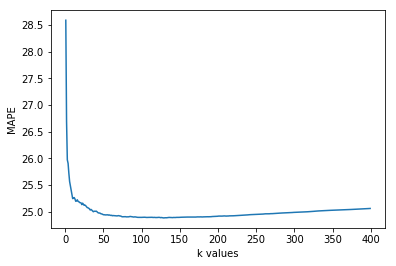

In [7]:
acc("us")

In [ ]:
acc("au")

In [ ]:
acc("pa")